## Exploring the data and providing descriptive statistics.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import uniform, randint
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
import pickle
import warnings
warnings.filterwarnings('ignore')

### Data Exploring

In [2]:
mobile_train = pd.read_csv("../data/train.csv")
mobile_test = pd.read_csv("../data/test.csv")
mobile_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
mobile_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [4]:
mobile_train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [5]:
mobile_train.duplicated().sum()

0

In [6]:
mobile_train.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [7]:
mobile_train.iloc[:,-1].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

### Check test data datatypes and null values

In [8]:
mobile_test.dtypes

id                 int64
battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
dtype: object

In [9]:
mobile_test.isnull().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

### descriptive statistics

In [10]:
numerical_cols = [0,2,4,6,7,8,10,11,12,13,14,15,16]
categorical_cols = [1,3,5,9,17,18,19,20]

In [11]:
mobile_train.iloc[:,numerical_cols].describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,0.501750,140.249000,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000
std,439.418206,0.816004,4.341444,18.145715,0.288416,35.399655,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000


#### fc column looks contains outliers ,all columns are normal distributed except (fc, px_height,sc_w) lets explore that throgh graphs

## Performing data visualization

### numerical columns

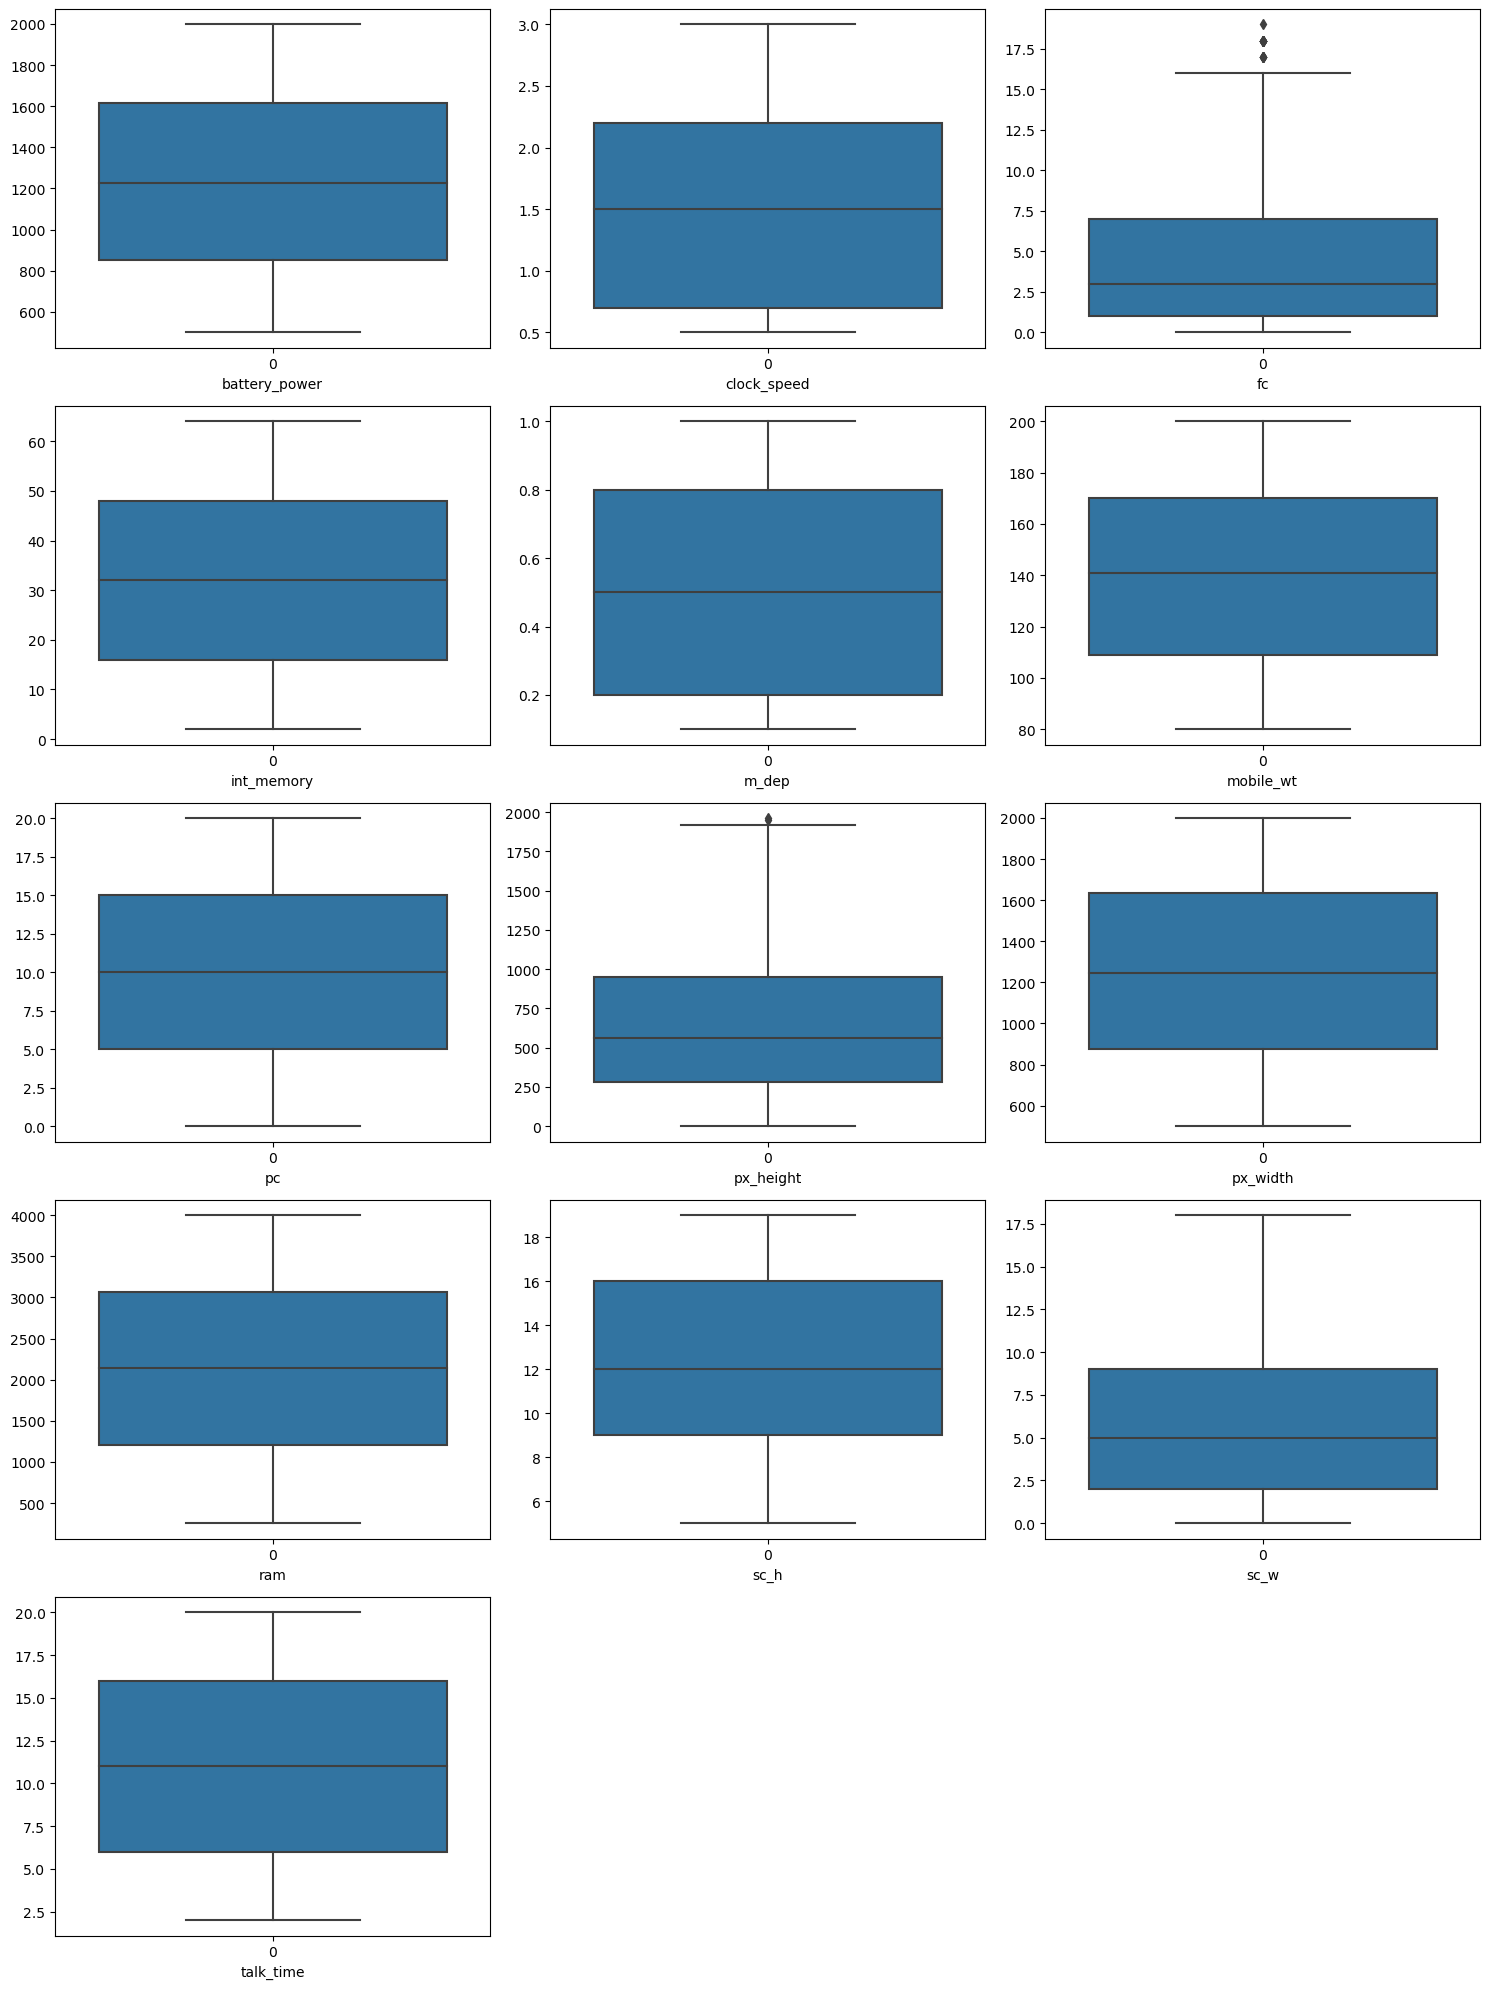

In [12]:
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))

for i, column in enumerate(mobile_train.iloc[:,numerical_cols]):
    row = i // 3
    col = i % 3
    
    sns.boxplot(data=mobile_train[column], ax=axs[row,col])
    
    axs[row,col].set_xlabel(column)

fig.delaxes(axs[4,1])
fig.delaxes(axs[4,2])
plt.tight_layout()
plt.show()

In [13]:
def delete_outliers(df,cols):
    
    threshold = 3

    z_scores = np.abs((df[cols] - df[cols].mean()) / df[cols].std())

    df_clean = df[(z_scores < threshold).all(axis=1) | ~df[cols].notnull().any(axis=1)]
    
    return df_clean

In [14]:
print("length of train data before removing outliers",len(mobile_train))
mobile_train = delete_outliers(mobile_train,['fc'])
print("length of train data after removing outliers",len(mobile_train))

length of train data before removing outliers 2000
length of train data after removing outliers 1988


#### plot histgrom to see distribution of data

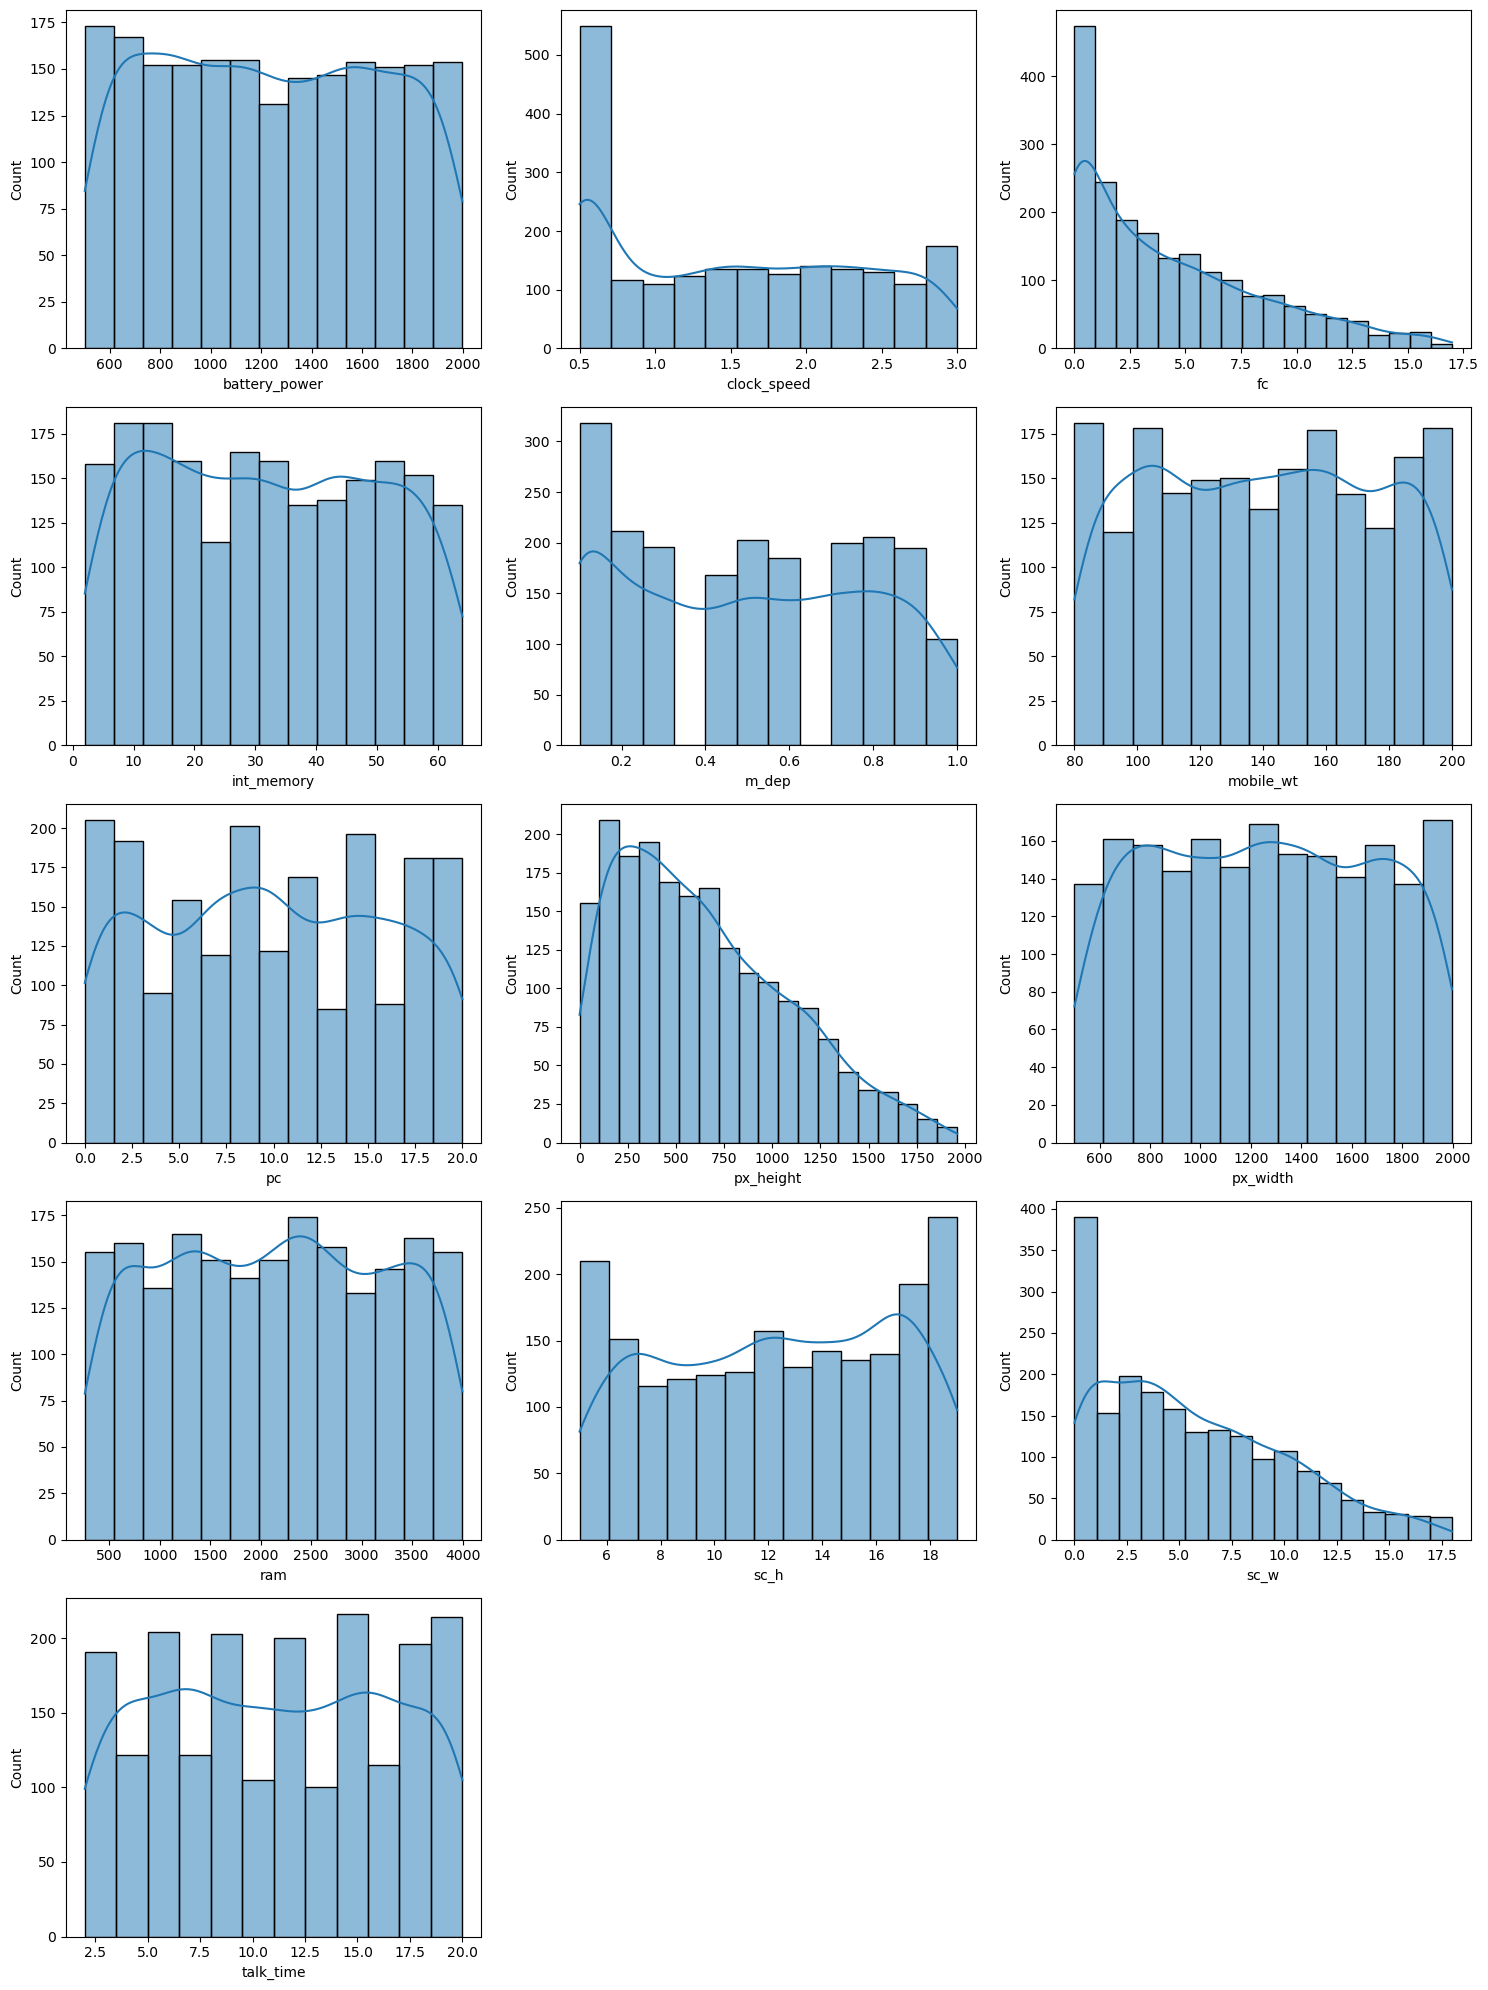

In [15]:
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))

for i, column in enumerate(mobile_train.iloc[:,numerical_cols]):
    row = i // 3
    col = i % 3
    
    sns.histplot(data=mobile_train[column], ax=axs[row,col] ,kde=True)
    
    axs[row,col].set_xlabel(column)

fig.delaxes(axs[4,1])
fig.delaxes(axs[4,2])

plt.tight_layout()
plt.show()

#### all columns have no specifc skew they have constant values repated randomly except (fc ,px_height,sc_w) are right skewed

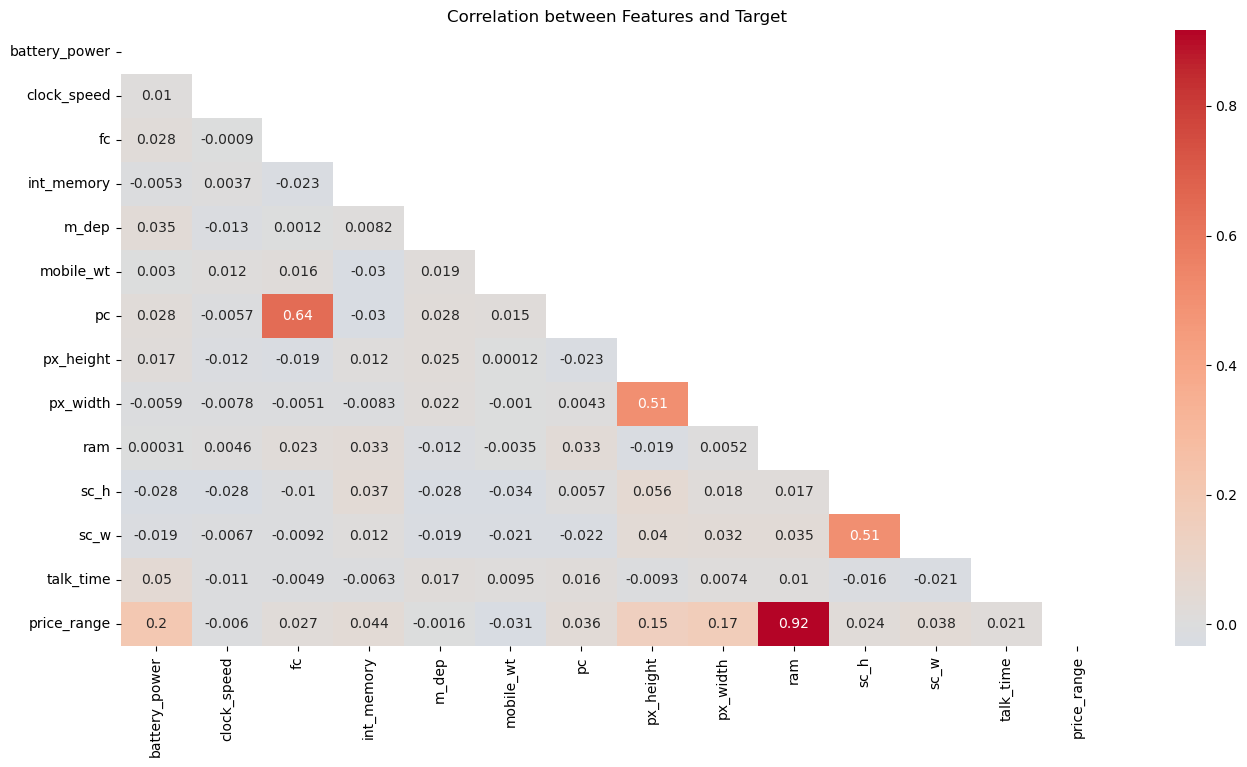

In [16]:
corr = mobile_train.iloc[:,[0,2,4,6,7,8,10,11,12,13,14,15,16,20]].corr()

mask = np.zeros_like(corr)
tringle = np.triu_indices_from(mask)
mask[tringle]=True

fig, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(corr, mask = mask,annot=True, cmap='coolwarm', center=0, ax=ax)
ax.set_title('Correlation between Features and Target')
plt.show()

ram is highly corrlated with price_range and there's a high corrlations between other features like fc and pc , px_height and px_width ,sc_h and sc_w

### categorical columns

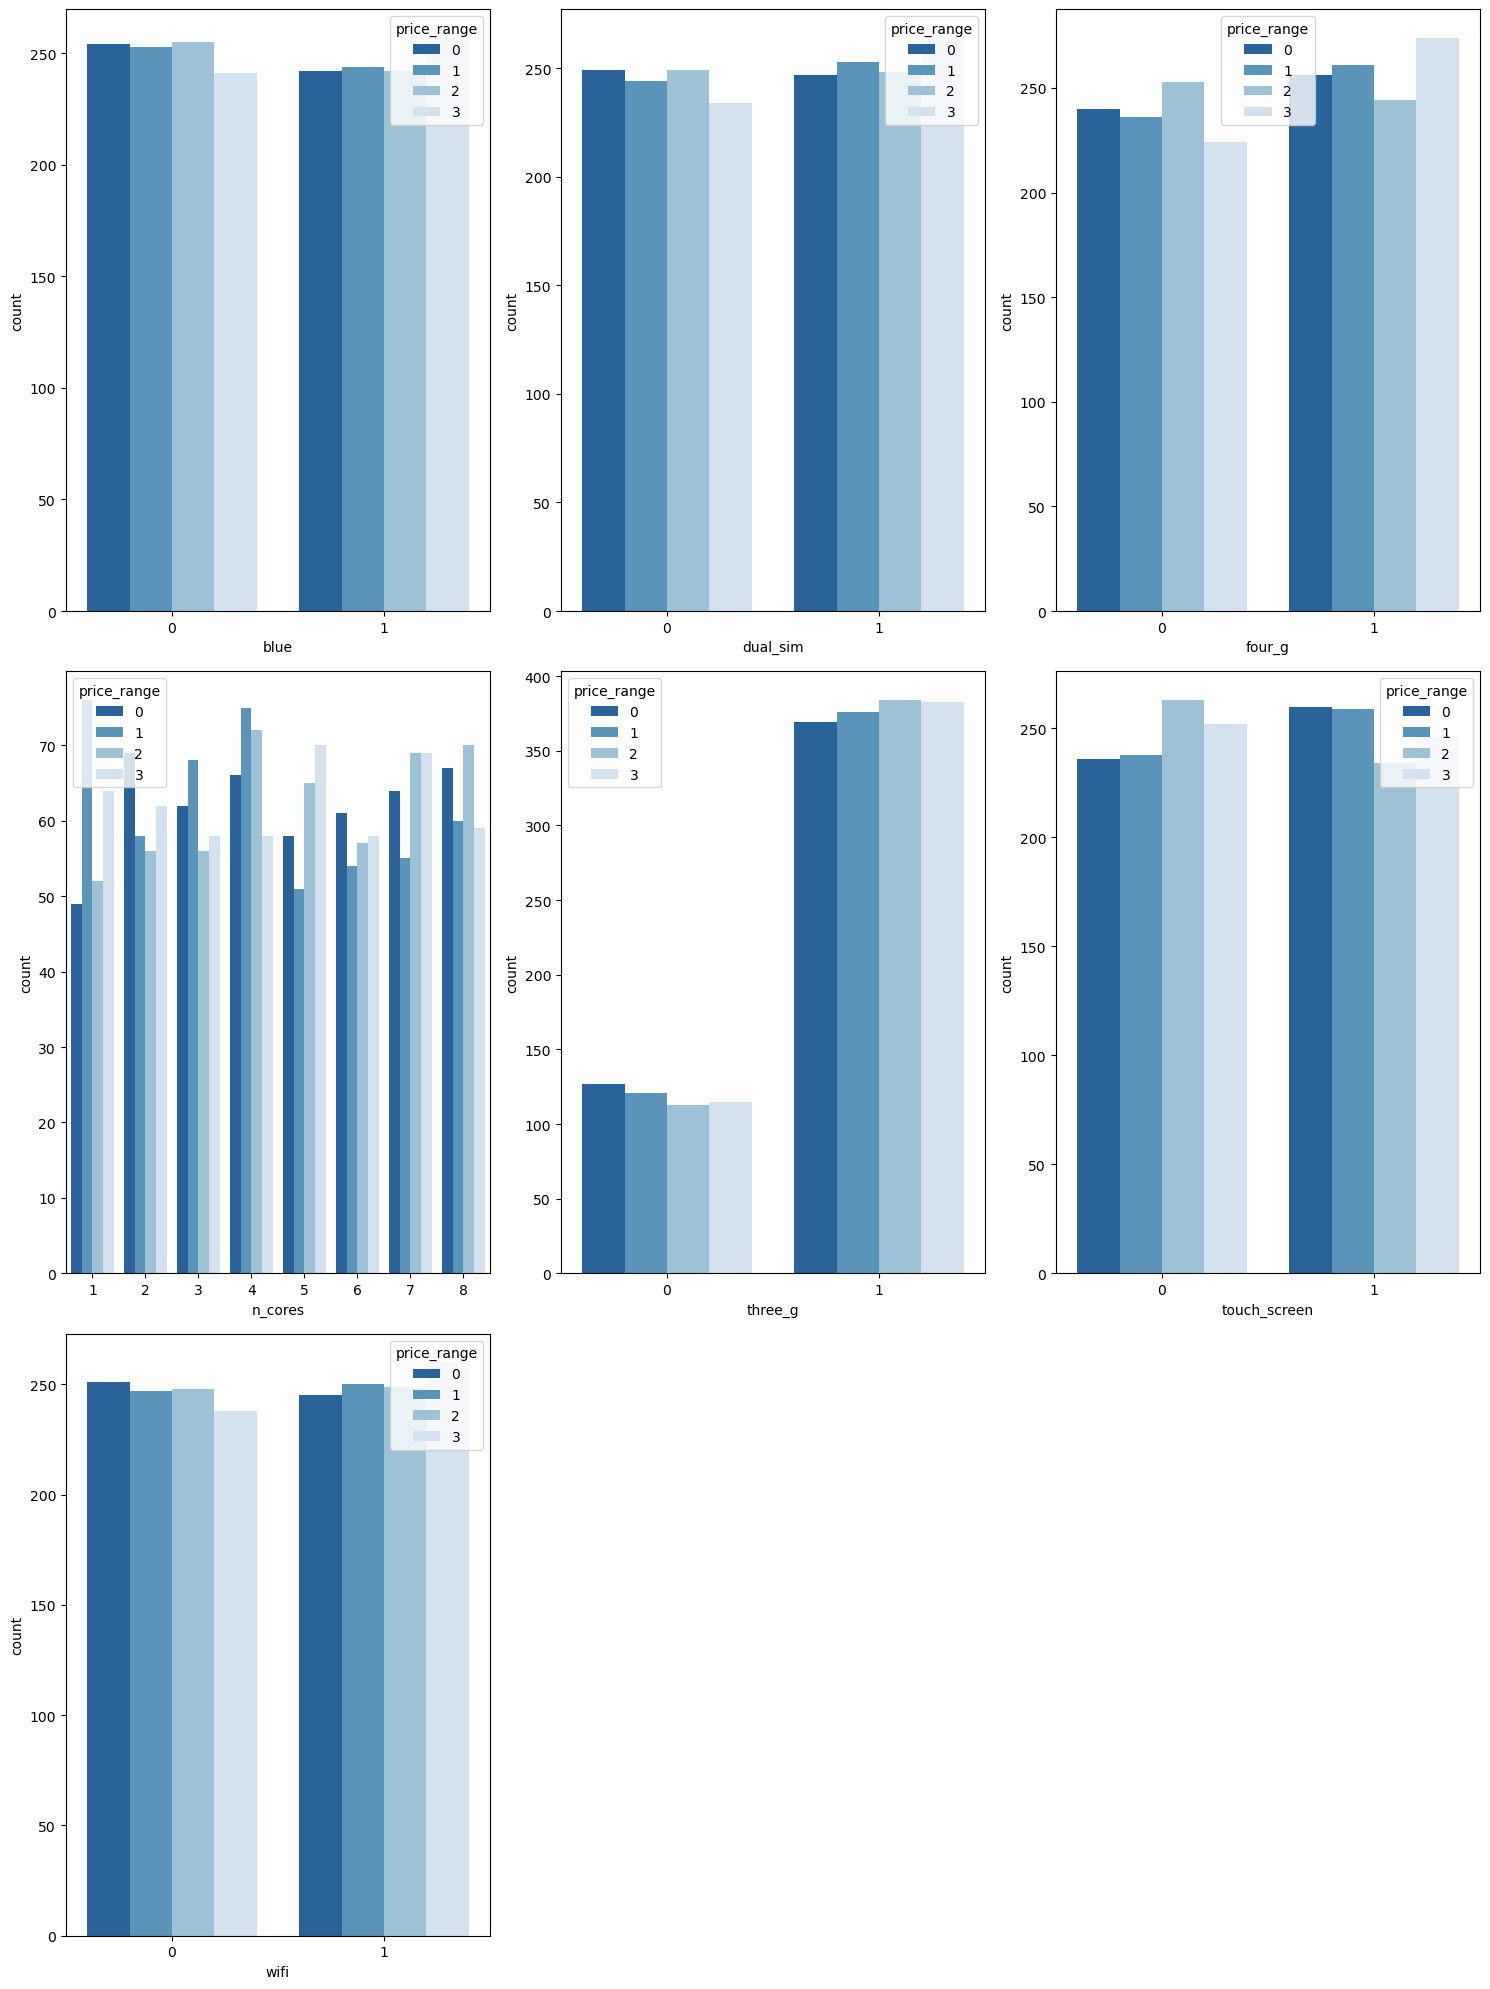

In [17]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 20))

for i, column in enumerate(mobile_train.iloc[:,categorical_cols]):
    row = i // 3
    col = i % 3
    
    sns.countplot(data=mobile_train,x = column, hue = 'price_range',ax=axs[row,col],palette='Blues_r')
    
    axs[row,col].set_xlabel(column)

    
fig.delaxes(axs[2,1])
fig.delaxes(axs[2,2])
plt.tight_layout()
plt.show()

### the count almost the same for all columns except three_g column and price range almost the same for both categoreis of all columns excpet n_core mobiles have 1, 2 and 4 cores have higher price more than others 

## Applying necessary data transformations and feature engineering.

### create new features

In [18]:
# using fc(Front Camera megapixels.) and pc (Primary Camera megapixels.) to create c (Cameras megapixels.)
mobile_train['c'] = mobile_train['fc'] + mobile_train['pc']
mobile_test['c'] = mobile_test['fc'] + mobile_test['pc']
# using px_height (Pixel Resolution Height.) and px_width (Pixel Resolution Width.) to create px_area (Pixel Resolution Area)
mobile_train['px_area'] = mobile_train['px_height'] * mobile_train['px_width']
mobile_test['px_area'] = mobile_test['px_height'] * mobile_test['px_width']
# sc_h (Screen Height of mobile in cm.) and sc_w (Screen Width of mobile in cm) to create sc_a (screen area of mobile in cm)
mobile_train['sc_a'] = mobile_train['sc_h'] * mobile_train['sc_w']
mobile_test['sc_a'] = mobile_test['sc_h'] * mobile_test['sc_w']

### one hot encoding for catgorical data

In [19]:
mobile_train = pd.get_dummies(mobile_train,columns = ['n_cores'],drop_first=True)
mobile_test = pd.get_dummies(mobile_test,columns = ['n_cores'],drop_first=True)

### feature scaling

In [20]:
target = mobile_train['price_range']
features = mobile_train.drop(columns='price_range')

In [21]:
features_scaled = scale(features)
mobile_test_scaled = scale(mobile_test)

## Performing feature selection to select most related features.

In [23]:
classifier = RandomForestClassifier()

rfe = RFE(estimator=classifier, n_features_to_select=15)
X_new = rfe.fit_transform(features_scaled,target)

selected_indices = rfe.get_support(indices=True)

selected_features = [features.columns[i] for i in selected_indices]
print("Selected Features:", selected_features)


Selected Features: ['battery_power', 'clock_speed', 'int_memory', 'm_dep', 'mobile_wt', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'c', 'px_area', 'sc_a']


### Trying training more than one classification model using “train.csv” and performing hyperparameter tuning.

#### Build LogisticRegression model with RandomizedSearch to select the best parameters

In [32]:
logistic_regression = LogisticRegression(multi_class='multinomial', solver='saga')

param_grid = {
    #'penalty': ['l2', 'l1'],
    'C': uniform(loc=0, scale=4),
    'fit_intercept': [True, False],
    'max_iter': [100, 500, 1000],
}

random_search = RandomizedSearchCV(logistic_regression, param_distributions=param_grid, n_iter=10, cv=5, random_state=42)
random_search.fit(features_scaled,target)

print("Best Hyperparameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Best Hyperparameters: {'C': 2.9279757672456204, 'fit_intercept': True, 'max_iter': 100}
Best Score: 0.9597508955356127


#### SVC

In [26]:
svc = SVC(decision_function_shape='ovr')

param_grid = {
    'C': uniform(loc=0, scale=4),
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4],
}

svc_random_search = RandomizedSearchCV(svc, param_distributions=param_grid, n_iter=10, cv=5, random_state=42)
svc_random_search.fit(features_scaled,target)

print("Best Hyperparameters:", svc_random_search.best_params_)
print("Best Score:", svc_random_search.best_score_)

Best Hyperparameters: {'C': 2.9279757672456204, 'degree': 2, 'kernel': 'linear'}
Best Score: 0.9572370669468248


#### RandomForestClassifier 

In [42]:
from sklearn.ensemble import RandomForestClassifier

rfc_classifier = RandomForestClassifier()

param_grid = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['auto', 'sqrt'],
}

rfc_random_search = RandomizedSearchCV(rfc_classifier, param_distributions=param_grid, n_iter=10, cv=5, random_state=42)
rfc_random_search.fit(features_scaled,target)

print("Best Hyperparameters:", rfc_random_search.best_params_)
print("Best Score:", rfc_random_search.best_score_)

Best Hyperparameters: {'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 662}
Best Score: 0.8797729200156956


#### XGBoost

In [29]:
xgb = XGBClassifier(objective='multi:softmax', num_class=len(set(target)))

param_grid = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5),
}

xgb_random_search = RandomizedSearchCV(xgb, param_distributions=param_grid, n_iter=10, cv=5, random_state=42)
xgb_random_search.fit(features_scaled,target)

print("Best Hyperparameters:", xgb_random_search.best_params_)
print("Best Score:", xgb_random_search.best_score_)

Best Hyperparameters: {'colsample_bytree': 0.9162213204002109, 'learning_rate': 0.07370173320348283, 'max_depth': 6, 'n_estimators': 376, 'subsample': 0.8087407548138583}
Best Score: 0.9225307899700012


## Evaluating models on training and testing data by providing classification scores.

In [30]:
def evaluate_model(model, X_test, y_test):
    """
    Evaluate a trained model on test data and return accuracy, precision, recall, F1-score, and AUC.
    
    Args:
    - model: A trained classification model with a `predict_proba` method.
    - X_test: Test features.
    - y_test: True labels for the test data.
    
    Returns:
    - accuracy: Accuracy of the model.
    - precision: Precision score of the model.
    - recall: Recall score of the model.
    - f1_score: F1-score of the model.
    """
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    return accuracy, precision, recall, f1

In [33]:
lr = LogisticRegression(**random_search.best_params_)

lr.fit(features_scaled,target)

accuracy, precision, recall, f1 = evaluate_model(lr,features_scaled,target)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9834004024144869
Precision: 0.9833775364739041
Recall: 0.9834004024144869
F1-score: 0.983379507879963


In [36]:
svc = SVC(**svc_random_search.best_params_)

svc.fit(features_scaled,target)

accuracy, precision, recall, f1 = evaluate_model(svc,features_scaled,target)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9834004024144869
Precision: 0.9833901324878952
Recall: 0.9834004024144869
F1-score: 0.9833927754341318


In [37]:
rfc = RandomForestClassifier(**rfc_random_search.best_params_)

rfc.fit(features_scaled,target)

accuracy, precision, recall, f1 = evaluate_model(rfc,features_scaled,target)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9909456740442656
Precision: 0.990943191456521
Recall: 0.9909456740442656
F1-score: 0.9909354150423584


In [35]:
xgb = XGBClassifier(**xgb_random_search.best_params_)

xgb.fit(features_scaled,target)

accuracy, precision, recall, f1 = evaluate_model(xgb,features_scaled,target)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


#### the model is overfiting cause of Limited Training Data the model memorize training data 

### I can't do this task with test data cause of absent of target column (price_range)

## Selecting the best model and saving it as a pkl file.

### I'm gonna choose LogisticRegression Cause linear simple model would be best for small and simple dataset

In [41]:
with open('../model/model.pkl', 'wb') as file:
    pickle.dump(lr, file)